In [221]:

import csv
import pandas as pd
import requests
import os
import io
import numpy as np
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


<h2>Gathering<h2>


<b>Loading the tweet image predictions from Udacity's servers

In [222]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
#image_prediction.p1_conf.sort_values
#image_prediction[image_prediction.duplicated()]


<b>Loading the twitter-archive-enhanced.csv into a DataFrame [WeRateDogs Twitter archive]

In [223]:


my_dict=[]
with open('twitter-archive-enhanced.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for line in csv_reader:
        my_dict.append(line)

archive = pd.DataFrame(my_dict)
#archive.retweeted_status_id.value_counts()
#archive.dtypes)
archive_copy=archive.copy()
archive_copy.doggo.value_counts(20)

None     0.958829
doggo    0.041171
Name: doggo, dtype: float64

<b>Loading Favorite count and retweet count from Twitter


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = '2321356116-Jphilh6LdlVMzoTQwHEfu1PXMfoA8trZOKnCTV7'
access_secret = 'HxrCmjCXPbAfZqvLzrLAJsB8K1miB2YM32N4vmQQVtbT7'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
#.get_status(tweet_id, tweet_mode='extended')




start = timer()
df_list = []
counter=0
errors = []
for id in archive['tweet_id']:
    try:
        tweet = api.get_status(id,tweet_mode='extended')
        df_list.append({'tweet_id': str(tweet.id),
                        'favorite_count': int(tweet.favorite_count),
                        'retweet_count': int(tweet.retweet_count)})
        counter=counter+1
        print(counter)
    except Exception as e:
        print(str(id) + " : " + str(e))

        
end = timer()

with open('tweet-json.txt',mode='w') as out_f:
     json.dump(df_list, out_f)



In [224]:
df_tweet_json = pd.DataFrame()

with open('tweet-json1.txt') as data_file:
    tweet = json.load(data_file)

    for line in tweet:
 #      print(line['tweet_id'])
        tweet_id = line['tweet_id']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
        df_tweet_json= df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_tweet_json = df_tweet_json.reset_index(drop=True)

In [225]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7477,35390
1,892177421306343426,5549,30638
2,891815181378084864,3670,23036
3,891689557279858688,7650,38692
4,891327558926688256,8250,36969


<h2>Assessing<h2>


<h3>Assess archive (from twitter-archive-enhanced.csv)

In [226]:
archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,,,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,,,,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,,,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",,,,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,,,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,,,,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,,,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,,,,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,,,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",,,,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,,,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,,,,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,,,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,,,,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,,,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,,,,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,,,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,,,,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,,,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ca

<b>Lowercase dog names are meaningless e.g. 'a','an','the'.

In [227]:
archive.dtypes

tweet_id                      object
in_reply_to_status_id         object
in_reply_to_user_id           object
timestamp                     object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
rating_numerator              object
rating_denominator            object
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

<b>Erronous data types: timestamp column is an object not a timestamp.Nominator and denominator columns are string not a integer.

In [228]:
archive.rating_denominator.value_counts()

10     2333
50     3   
11     3   
80     2   
20     2   
16     1   
00     1   
110    1   
150    1   
70     1   
40     1   
7      1   
170    1   
120    1   
15     1   
2      1   
130    1   
90     1   
Name: rating_denominator, dtype: int64

In [229]:
archive[['text', 'rating_numerator', 'rating_denominator']].query("rating_denominator != '10'")


,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,00
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


<b>There are denominators other than 10.

In [230]:
archive.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
14      54 
7       54 
5       37 
6       32 
3       19 
4       17 
2       9  
1       9  
75      2  
420     2  
15      2  
0       2  
144     1  
27      1  
20      1  
44      1  
99      1  
1776    1  
007     1  
121     1  
84      1  
182     1  
666     1  
26      1  
17      1  
960     1  
204     1  
60      1  
165     1  
45      1  
50      1  
88      1  
24      1  
143     1  
80      1  
Name: rating_numerator, dtype: int64

<b>There rating_numerator values out of range

<h3>Assess image predictions(tsv file from Udacity's server)

In [231]:

image_prediction.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
1861,842535590457499648,https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg,1,Pembroke,0.685084,True,Cardigan,0.314608,True,basenji,0.000160,True
402,673697980713705472,https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg,1,porcupine,0.151876,False,hen,0.111380,False,doormat,0.058934,False
939,703769065844768768,https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg,2,boxer,0.838994,True,Greater_Swiss_Mountain_dog,0.088800,True,bull_mastiff,0.031684,True
1091,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True
886,699036661657767936,https://pbs.twimg.com/media/CbN6IW4UYAAyVDA.jpg,1,Chihuahua,0.222943,True,toyshop,0.179938,False,Weimaraner,0.163033,True
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
711,685315239903100929,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,2,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,0.105074,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1222,744334592493166593,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,1,Samoyed,0.960543,True,Pomeranian,0.012192,True,white_wolf,0.004753,False


In [232]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Staffordshire_bullterrier    20 
Siberian_husky               20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
Eskimo_dog                   18 
beagle                       18 
teddy                        18 
Shetland_sheepdog            18 
Maltese_dog                  18 
Rottweiler                   17 
Shih-Tzu                     17 
Lakeland_terrier             17 
Italian_greyhound            16 
kuvasz                       16 
          

<b>p1, p2, p3 written in both uppercase and lowercase

<h3> Assess df_tweet_json (json file I created)

In [233]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7477,35390
1,892177421306343426,5549,30638
2,891815181378084864,3670,23036
3,891689557279858688,7650,38692
4,891327558926688256,8250,36969


## Quality
##### `archive` table 
1. This dataset includes retweets
2. Erronous data: timestamp column is an object not a timestamp.Nominator and denominator columns are string not a integer. The tweet_id should be of type str instead of int as these are long numbers and we don't intend to do any mathematical calculation with them.
3. Replace 'a', 'an', 'the', 'None' and other lower case words with empty string in name column
4. There are outliers in rating_numerator. Some of them are due to multiple occurences of the pattern \d+\/\d+. 
5. Rating_numerator column has some exceptionally high values which leads to exceptionally high rating which can be inaccurate.
6. Source column still has the HTML tags and the column is  not human readable


##### `image prediction` table
7. p1, p2, p3 written in both uppercase and lowercase


## Tidiness
##### `archive` table
8. Columns for dog stages are untidy.

##### `image prediction` table
9. This data set is part of the same observational unit as the data in the archive.

##### `df_tweet_json` table
10. This data set is part of the same observational unit as the data in the archive.





                           
                                                                  

<h2>Cleaning<h2>

 #####  Cleaning:`archive` table 


#### 1 Define
Drop retweets and columns about retweet status

#### 1 - Code


In [234]:
archive.shape

(2356, 17)

In [235]:
archive.retweeted_status_id.value_counts()

                         2175
6.853251128501248e+17    1   
7.681934045178307e+17    1   
8.000650281163858e+17    1   
8.609144852504699e+17    1   
8.001414224018309e+17    1   
8.370113446668124e+17    1   
8.663349647612027e+17    1   
7.790560957887529e+17    1   
7.761133056561889e+17    1   
8.203146337770619e+17    1   
7.887659149929021e+17    1   
8.650134204453683e+17    1   
6.671382696715059e+17    1   
8.01167903437357e+17     1   
8.3890598062882e+17      1   
7.616729943768064e+17    1   
8.269586533285929e+17    1   
8.192276884602388e+17    1   
8.331246945974436e+17    1   
6.790626142704681e+17    1   
7.116947884295537e+17    1   
8.482893821761004e+17    1   
6.67509364010451e+17     1   
7.33109485275861e+17     1   
6.769365419361853e+17    1   
6.67548415174144e+17     1   
6.718968093007094e+17    1   
8.199522364533637e+17    1   
6.798284471878574e+17    1   
                        ..   
7.750851326004429e+17    1   
7.399791916392448e+17    1   
8.32369877

In [236]:

# Drop retweets
archive = archive[archive.retweeted_status_id=='']
#archive[archive.retweeted_status_id.isnull()]
# Drop replies
archive= archive[archive.in_reply_to_user_id=='']

In [237]:
archive.shape

(2097, 17)

In [238]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,,,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,,,,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,,,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",,,,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,,,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,,,,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,,,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,,,,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,,,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",,,,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [239]:

archive.head(10)
archive.shape
archive.head(1)

#drop columns including retweet info
archive=archive.iloc[:,[0,3,4,5,9,10,11,12,13,14,15,16]]

In [240]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [241]:
archive.shape

(2097, 12)

#### 1  Test

In [242]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### 2- Define
Timestamp column is an object not a timestamp. Nominator and denominator columns are string not a integer.


#### 2 - Code

In [243]:

archive.timestamp = pd.to_datetime(archive.timestamp)
archive.rating_numerator = archive.rating_numerator.astype(int)
archive.rating_denominator = archive.rating_denominator.astype(int)
archive.tweet_id=archive.tweet_id.astype(str)

##### 2 - Test

In [244]:
archive.dtypes

tweet_id              object        
timestamp             datetime64[ns]
source                object        
text                  object        
expanded_urls         object        
rating_numerator      int64         
rating_denominator    int64         
name                  object        
doggo                 object        
floofer               object        
pupper                object        
puppo                 object        
dtype: object

#### 3 - Define
Lowercase names are actual names, change lowercase entries to None

##### 3 - Code


In [245]:
#Omit lowercase words which are not names.

archive['if_lowercase']=archive['name'].str.islower()
archive['if_lowercase'].head()
archive_not_actual=archive[archive['if_lowercase']==True]
#archive_not_actual.name.value_counts()
#archive.name.value_counts()b
archive.shape

(2097, 13)

In [246]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,if_lowercase
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,False
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,False
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,False


In [247]:

mask = archive.if_lowercase==True
change_name = 'name'
archive.loc[mask, change_name] ='None'
#archive.name.value_counts()

#I do not neet archive['if_lowercase'] anymore, drop it.
archive=archive.iloc[:,:-1]


In [248]:
#Change 'None' to emptry string for further analysis.
archive['name'] = archive['name'].replace('None', "")

##### 3 - Test


In [249]:

archive['name'].head()

0    Phineas 
1    Tilly   
2    Archie  
3    Darla   
4    Franklin
Name: name, dtype: object

In that case first accurance is observed to be another info such as date other than rating. Therefore if there is a second accurance it will be considered as rating.

#### 4. Define

There are outliers in rating_numerator, Some of them are due to multiple occurences of the pattern "(\d+(\.\d+)?\/\d+(\.\d+)?)". Drop entries with multiple "(\d+(\.\d+)?\/\d+(\.\d+)?)" pattern


In [250]:
#To be able to see whole text.
pd.set_option('display.max_colwidth', -1)
archive[['text', 'rating_numerator', 'rating_denominator']].query("rating_denominator != '10'")


,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


#### 4. Code

In [251]:
archive.shape

(2097, 12)

In [252]:
#There are multiple occurences  of the pattern \d+\/\d+ in text which leads erronous n. Lets extract this by our self and see what we get.
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" #we could expect an integer rating on what we saw, but maybe some floats are the case

archive["count1"] = archive.text.str.count(pattern)
archive.count1.head()
print(archive.query("count1 == '2'").text)

766     "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                                
1007    This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ                   
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ       
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                   
1202    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                              
1222    Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE   
1359    This is Socks. That water pup w the super legs just spla

In [253]:
archive = archive[archive.count1 == 1]
archive = archive.reset_index(drop=True)
archive.shape

(2070, 13)

#### 4. Test

In [254]:
archive.count1.value_counts()

1    2070
Name: count1, dtype: int64

In [255]:
archive.drop(['count1'], axis='columns', inplace=True)
archive.shape

(2070, 12)

#### 5. Define
Some of the exceptionally high rating numerators are due to float entries. 


In [256]:
archive[['text', 'rating_numerator', 'rating_denominator']].query("rating_numerator > 20")

,text,rating_numerator,rating_denominator
339,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
403,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
699,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
769,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
901,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1005,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1030,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1050,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


#### 5. Code

In [257]:
#Some of the exceptionally high rating numerators are due to non-integer entries. 
#Round those float numbers up and insert corrected entries.

archive.loc[338, 'rating_numerator'] = [10] # converted from 9.75
archive.loc[692, 'rating_numerator'] = [10] # converted from 9.75
archive.loc[760, 'rating_numerator'] = [12] # converted from 11.27
archive.loc[1694, 'rating_numerator'] = [12] # converted from 11.26
archive.loc[1977, 'rating_numerator'] = [10] # converted from 11.26

#### 5. Test

In [258]:
archive.loc[338]

tweet_id              820749716845686786                                                                                                                  
timestamp             2017-01-15 21:49:15                                                                                                                 
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                  
text                  Meet Sunny. He can take down a polar bear in one fell swoop. Fr*cken deadly af. 13/10 would pet with caution https://t.co/EMq8Ud6Ze1
expanded_urls         https://twitter.com/dog_rates/status/820749716845686786/photo/1,https://twitter.com/dog_rates/status/820749716845686786/photo/1     
rating_numerator      10                                                                                                                                  
rating_denominator    10                                              

#### 6. Define

Remove html tags and link to extract the source itself.



#### 6. Code

In [259]:
archive['source'] = archive.source.str.extract("\>(.*?)\<", expand = True)


#### 6. Test

In [260]:
archive['source'].value_counts()

Twitter for iPhone     1939
Vine - Make a Scene    91  
Twitter Web Client     29  
TweetDeck              11  
Name: source, dtype: int64

 #####  Cleaning:`image_prediction` table 

#### 7. Define
p1, p2, p3 written in both uppercase and lowercase. Change all entries to lowercase for further analysis

#### 7. Code

In [261]:
image_prediction['p1'] = image_prediction['p1'].str.lower()
image_prediction['p2'] = image_prediction['p2'].str.lower()
image_prediction['p3'] = image_prediction['p3'].str.lower()


In [262]:
#### 7. Test

In [263]:
image_prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,1,toy_poodle,0.497755,True,golden_retriever,0.282017,True,miniature_poodle,0.090032,True
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,eskimo_dog,0.616457,True,siberian_husky,0.381330,True,malamute,0.001670,True
1511,786233965241827333,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,labrador_retriever,0.478193,True,schipperke,0.224817,True,staffordshire_bullterrier,0.077396,True
111,667902449697558528,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,norwegian_elkhound,0.298881,True,malamute,0.279479,True,eskimo_dog,0.198428,True
267,670807719151067136,https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg,1,old_english_sheepdog,0.958035,True,sealyham_terrier,0.013892,True,border_collie,0.004601,True
317,671744970634719232,https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg,1,ice_bear,0.251193,False,ram,0.213839,False,arctic_fox,0.081551,False
99,667773195014021121,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,west_highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,labrador_retriever,0.317365,True,tibetan_mastiff,0.012260,True
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False


## Tidiness
##### `archive` table


#### 8. Define
The columns doggo, floofer,pupper and puppo are not easy to analyze and should be in one column, lets create dogs_stage column.

#### 8. Code

In [264]:
#tidiness                                                    
archive=pd.melt(frame=archive,id_vars=
['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name'],var_name='dogs', value_name='dogs_stage')
archive.dogs_stage.value_counts()


# drop dogs
archive = archive.drop('dogs', 1)
#Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
archive=archive.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')


#### 8. Test

In [265]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogs_stage'],
      dtype='object')

In [266]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage
1995,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,,None
1994,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,,None
1993,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,,None
1992,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,None
1991,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7,10,Reese,None


#### 9. Define
image_prediction data set is part of the same observational unit as the data in the archive. Lets merge those data sets.

#### 9. Code

In [267]:
#Change data type to be able to join tables on tweet_id
archive.tweet_id= archive.tweet_id.astype(int)
df_master_tentative=pd.merge(archive,image_prediction, on='tweet_id', how='outer')

#### 9. Test

In [268]:
df_master_tentative.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogs_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [269]:

df_master_tentative.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10.0,,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,rottweiler,0.999091,True,miniature_pinscher,0.00045,True,black-and-tan_coonhound,0.000157,True
1,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10.0,10.0,,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,porcupine,0.989154,False,bath_towel,0.00630,False,badger,0.000966,False


#### 10. Define
df_tweet_json data set is part of the same observational unit as the data in the archive. Lets merge those data sets.

#### 10. Code

In [270]:
#Change data type to be able to join tables on tweet_id
df_tweet_json.tweet_id= df_tweet_json.tweet_id.astype(int)


In [271]:
df_master=pd.merge(df_master_tentative,df_tweet_json, on='tweet_id', how='outer')

#### 10. Test

In [272]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogs_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [273]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12.0,10.0,,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,...,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,79.0,286.0
1,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10.0,10.0,,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,...,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,217.0,420.0
2,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6.0,10.0,,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,...,0.980815,False,drake,0.006918,False,hen,0.005255,False,535.0,724.0
3,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11.0,10.0,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,...,0.825670,True,french_bulldog,0.056639,True,staffordshire_bullterrier,0.054018,True,81.0,292.0
4,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10.0,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,...,0.676376,True,irish_terrier,0.054933,True,yorkshire_terrier,0.040576,True,56.0,179.0


## Storing, Analyzing, and Visualizing Data

In [275]:
#storing main dataframe as csv
df_master.to_csv('df_master.csv', encoding='utf-8', index=False)

In [276]:
df = pd.read_csv('df_master.csv')

## How did the interaction per tweet changed over time?


In [277]:

#create a timestamp for analyzing data in month buckets
df['month_year'] = pd.to_datetime(df["timestamp"]).dt.to_period('M')

In [278]:
df_groupby = df.groupby("month_year", as_index = False).sum()

In [279]:
df_groupby.head()

,month_year,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
0,2015-11,1.925877e+20,2977.0,2880.0,290.0,158.668271,40.395267,18.701524,138411.0,336618.0
1,2015-12,2.474579e+20,3744.0,3840.0,382.0,202.315424,45.460171,21.345647,486109.0,1182681.0
2,2016-01,1.231582e+20,1948.0,1890.0,180.0,89.186760,22.156829,10.563912,245106.0,649611.0
3,2016-02,8.250577e+19,1286.0,1250.0,124.0,58.594716,14.221074,7.153348,161974.0,451161.0
4,2016-03,9.293936e+19,1572.0,1500.0,137.0,75.152694,15.362658,6.533203,199083.0,548269.0


In [280]:
## How did the interaction  changed over time?


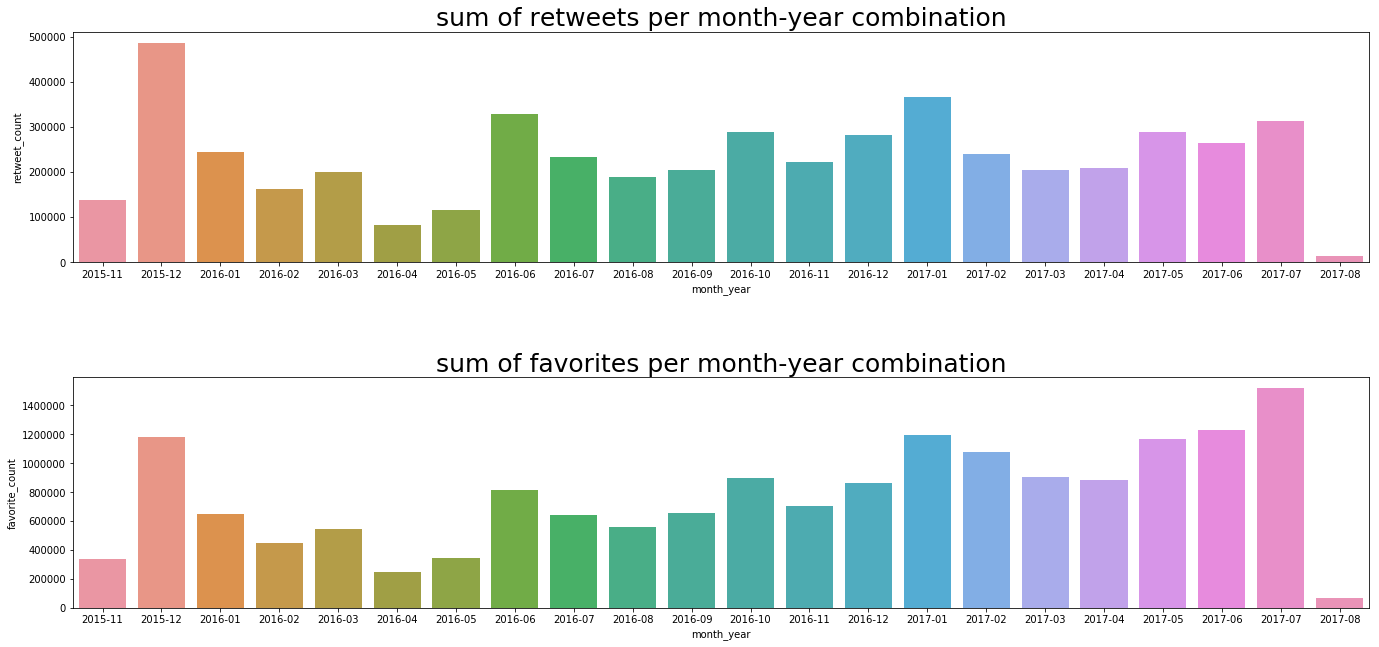

In [281]:
plt.axes ([0.02,1,3,0.8])
#plt.subplots(figsize = (20,5))
sns.barplot(x = "month_year", y = "favorite_count", data = df_groupby)
plt.title("sum of favorites per month-year combination", size=25);
          
          
          
plt.axes ([0.02,2.2,3,0.8])
#plt.subplots(figsize = (20,5))
sns.barplot(x = "month_year", y = "retweet_count", data = df_groupby)
plt.title("sum of retweets per month-year combination", size=25);


<b>We cannot observe a consistent trend over time. Lets look at average number of retweets and favorites by tweets.

In [282]:
df_groupby_avg = df.groupby("month_year", as_index = False).mean()

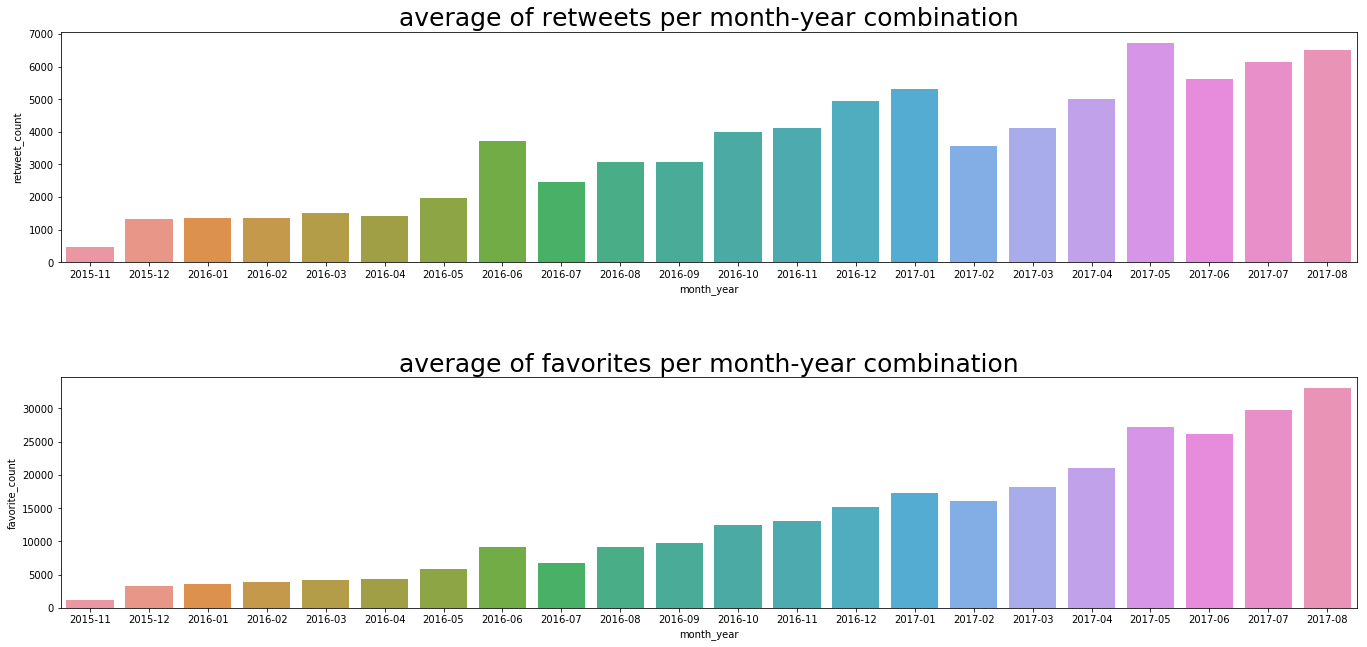

In [283]:
plt.axes ([0.02,1,3,0.8])
#plt.subplots(figsize = (20,5))
sns.barplot(x = "month_year", y = "favorite_count", data = df_groupby_avg)
plt.title("average of favorites per month-year combination", size=25);
          
          
          
plt.axes ([0.02,2.2,3,0.8])
#plt.subplots(figsize = (20,5))
sns.barplot(x = "month_year", y = "retweet_count", data = df_groupby_avg)
plt.title("average of retweets per month-year combination", size=25);

<b>There is an upward trend, it can be concluded that interaction per tweet increases.

## Is there any relationship between the rating and the number of retweets?

In [284]:
df['rating'] =df['rating_numerator']/df['rating_denominator']


In [285]:
df_rating_scatter =df[df['rating']<2.5 ]#Exclude outliers


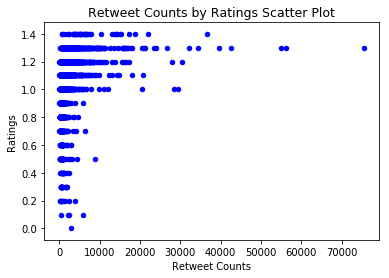

In [286]:
df_rating_scatter.plot(x='retweet_count', y='rating', kind='scatter',color="blue");
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot',size=12.5);

<b>The highest ratings do not always receive the most retweets.